# 1. Topic + dataset

The dataset I chose shows how coffee consumption can relate to health and lifestyle factors. There are quantitative factors like age, BMI, sleep hours, physical activity hours, and more. There are also qualitative data like gender, country, sleepy quality, stress level, and more. The dataset is trying to show the relationship between coffee intake and various aspects of everyday life and health that can be impacted.

The goal of analyzing this dataset is to identify and understand how coffee consumption habits affect health indicators, like sleep quality, stress, and BMI from both numerical and categorical patterns.

Most of my code has been from Gemini, as well as past materials from class/assignments

In [3]:
# Mounting Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from operator import attrgetter

In [5]:
coffee_health_data = pd.read_csv('/content/drive/MyDrive/Datasets/coffee_health.csv')
coffee_health_data.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


# 2. Clean, organize, and explore

##2.1

In [6]:
# Remove unnecessary columns (e.g., ID)
# coffee_health_data = coffee_health_data.drop('ID', axis=1) # This line caused the error

# Rename columns for clarity (example: rename 'Coffee_Intake' to 'Coffee_Cups')
coffee_health_data = coffee_health_data.rename(columns={'Coffee_Intake': 'Coffee_Cups'})

# Check for missing values
print("Missing values before handling:")
print(coffee_health_data.isnull().sum())

# Handle missing values in 'Health_Issues' by filling with 'None'
coffee_health_data['Health_Issues'] = coffee_health_data['Health_Issues'].fillna('None')

# Check for missing values after handling
print("\nMissing values after handling:")
print(coffee_health_data.isnull().sum())

# Display data types
print("\nData types:")
print(coffee_health_data.dtypes)

# You can further clean data types or remove special characters if needed based on the data inspection
# For example, if a numerical column had '$', you would remove it and convert to numeric.
# coffee_health_data['Column_Name'] = coffee_health_data['Column_Name'].str.replace('$', '', regex=False).astype(float)

display(coffee_health_data.head())

Missing values before handling:
ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Cups                   0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64

Missing values after handling:
ID                         0
Age                        0
Gender                     0
Country                    0
Coffee_Cups                0
Caffeine_mg                0
Sleep_Hours                0
Sleep_Quality              0
BMI                        0
Heart_Rate                 0
Stress_Level               0
Physical_Activity_Hours    0
Health_Issues              0
Occupation                 0
Smoki

,ID,Age,Gender,Country,Coffee_Cups,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,None,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,None,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


##2.2

In [7]:
# Descriptive statistics for quantitative continuous data
print("Descriptive statistics for continuous variables:")
display(coffee_health_data.describe())

# Calculate mode separately as describe() doesn't include it
print("\nMode for continuous variables:")
print(coffee_health_data[['Age', 'Coffee_Cups', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours']].mode())

# Frequency counts for quantitative discrete and qualitative data
print("\nFrequency counts for discrete and qualitative variables:")
for col in ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation', 'Smoking', 'Alcohol_Consumption']:
    print(f"\nFrequency counts for {col}:")
    display(coffee_health_data[col].value_counts())

Descriptive statistics for continuous variables:


,ID,Age,Coffee_Cups,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000



Mode for continuous variables:
   Age  Coffee_Cups  Caffeine_mg  Sleep_Hours   BMI  Heart_Rate  \
0   18          0.0          0.0          6.7  15.0          70   

   Physical_Activity_Hours  
0                      8.4  

Frequency counts for discrete and qualitative variables:

Frequency counts for Gender:


,count
Gender,
Female,5001
Male,4773
Other,226



Frequency counts for Country:


,count
Country,
Canada,543
India,524
Norway,523
China,521
UK,519
Sweden,513
South Korea,512
Finland,510
Italy,509



Frequency counts for Sleep_Quality:


,count
Sleep_Quality,
Good,5637
Fair,2050
Excellent,1352
Poor,961



Frequency counts for Stress_Level:


,count
Stress_Level,
Low,6989
Medium,2050
High,961



Frequency counts for Health_Issues:


,count
Health_Issues,
None,5941
Mild,3579
Moderate,463
Severe,17



Frequency counts for Occupation:


,count
Occupation,
Office,2073
Other,2038
Student,1968
Healthcare,1964
Service,1957



Frequency counts for Smoking:


,count
Smoking,
0,7996
1,2004



Frequency counts for Alcohol_Consumption:


,count
Alcohol_Consumption,
0,6993
1,3007


##2.3

/tmp/ipython-input-653278449.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=coffee_health_data, x='Health_Issues', y='Coffee_Cups', ci=None)


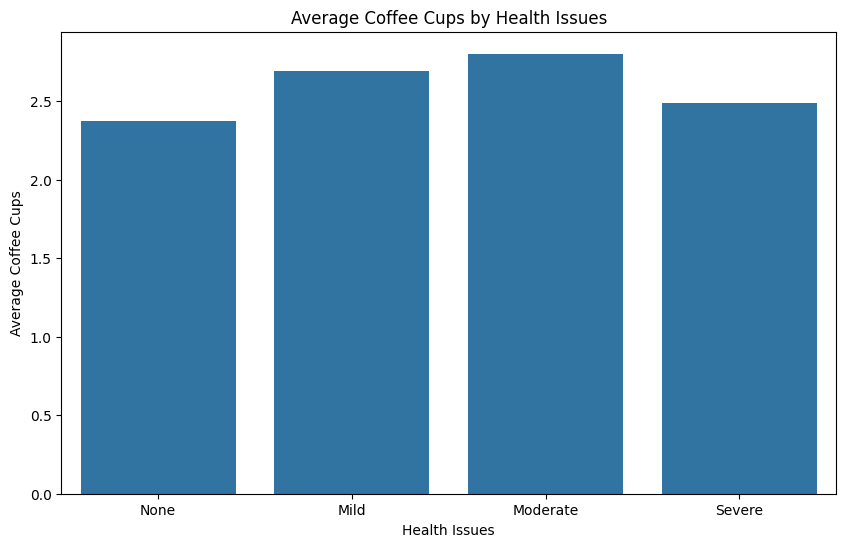

In [8]:
# Visualization 1: Bar chart of Average Coffee Cups by Health Issues
plt.figure(figsize=(10, 6))
sns.barplot(data=coffee_health_data, x='Health_Issues', y='Coffee_Cups', ci=None)
plt.title('Average Coffee Cups by Health Issues')
plt.xlabel('Health Issues')
plt.ylabel('Average Coffee Cups')
plt.show()

The visualization above shows the relationship between the average number of coffee cups a participant drinks and health issues.

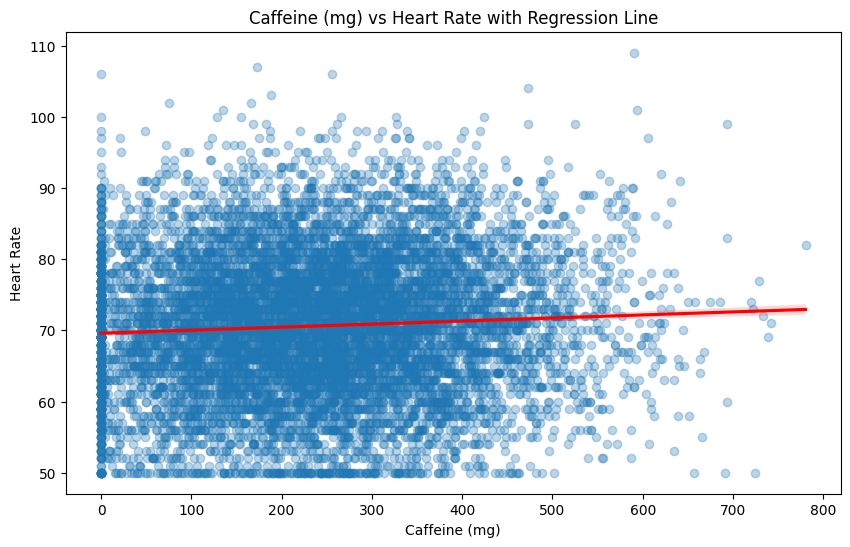

In [9]:
# Visualization 2: Scatter plot of Caffeine_mg vs Heart Rate
plt.figure(figsize=(10, 6))
sns.regplot(data=coffee_health_data, x='Caffeine_mg', y='Heart_Rate',
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Caffeine (mg) vs Heart Rate with Regression Line')
plt.xlabel('Caffeine (mg)')
plt.ylabel('Heart Rate')
plt.show()


The visualization above shows the correlation between caffeine intake and heart rate. While there is a slight positive slope, it can be seen that the more caffeine that is ingested, heart rate tends to increase.

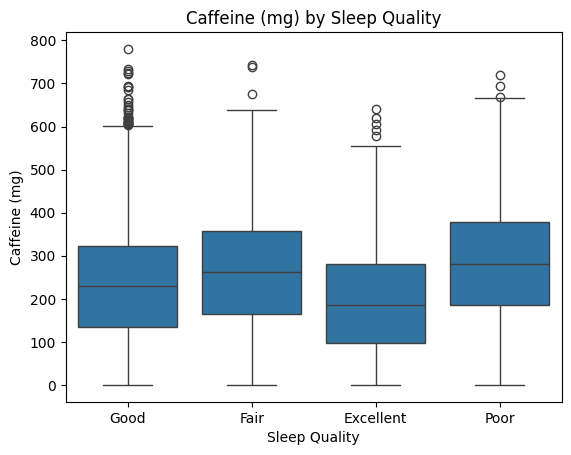

In [19]:
# Visualization 3: Box plot of Caffeine_mg by Sleep Quality
sns.boxplot(data=coffee_health_data, x='Sleep_Quality', y='Caffeine_mg')
plt.title('Caffeine (mg) by Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Caffeine (mg)')
plt.show()

The visualization above shows the relationship between caffeine intake and sleep quality.

Most common words in Health Issues:


[('mild', 3579), ('moderate', 463), ('severe', 17)]


Most common words in Sleep Quality:


[('good', 5637), ('fair', 2050), ('excellent', 1352), ('poor', 961)]

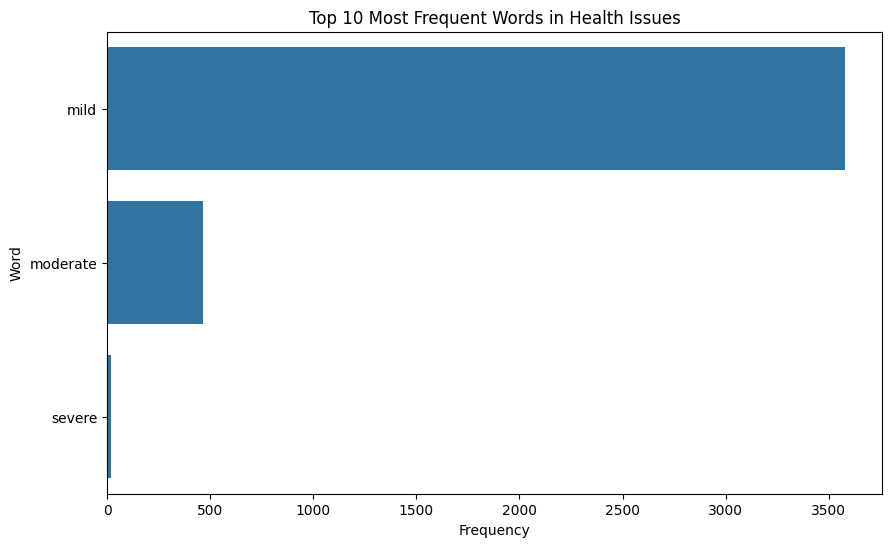

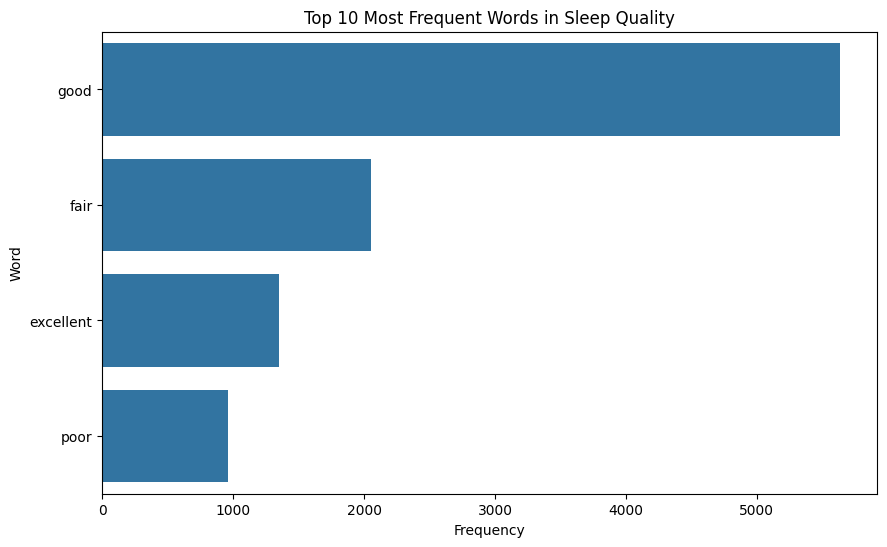

In [11]:
from collections import Counter
import re

# Function to perform word frequency analysis
def analyze_word_frequency(text_series, title):
    # Convert to lowercase and remove punctuation
    words = text_series.astype(str).str.lower().apply(lambda x: re.findall(r'\b\w+\b', x)).explode()
    word_counts = Counter(words)
    # Remove common stop words if necessary (e.g., 'none' in health issues)
    if 'none' in word_counts:
        del word_counts['none']
    return word_counts

# Analyze word frequency for 'Health_Issues'
health_issues_word_counts = analyze_word_frequency(coffee_health_data['Health_Issues'], 'Health Issues')

# Analyze word frequency for 'Sleep_Quality'
sleep_quality_word_counts = analyze_word_frequency(coffee_health_data['Sleep_Quality'], 'Sleep Quality')

# Display most common words
print("Most common words in Health Issues:")
display(health_issues_word_counts.most_common(10))

print("\nMost common words in Sleep Quality:")
display(sleep_quality_word_counts.most_common(10))

# Visualize word frequency for Health Issues
health_issues_df = pd.DataFrame(health_issues_word_counts.most_common(10), columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=health_issues_df)
plt.title('Top 10 Most Frequent Words in Health Issues')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

# Visualize word frequency for Sleep Quality
sleep_quality_df = pd.DataFrame(sleep_quality_word_counts.most_common(10), columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=sleep_quality_df)
plt.title('Top 10 Most Frequent Words in Sleep Quality')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

##2.4

The distribution of the data comes from a wide range of a diverse population from many different countries and genders. The ages seem to be quite varied, with a mode of 18 and going up to a range of 80. Coffee consumption and caffeine intake show a range, with the mean of coffee intake being 2.5 cups and the caffeine intake being 238 mg. While participants had “good” sleep quality as the most frequent, “fair,” “excellent,” and “poor” are also present. Stress levels are fairly low, which can show that coffee may not have an impact on stress levels. BMI, on average, seems healthy; there is a standard deviation of 15 and a max of 38.1, which means that there is a wide range of body weights within the sample. “None” and “mild” are the most frequent health issues reported, which can mean that the data that was collected was from an audience that is generally healthy. The job occupations are evenly distributed throughout the listed categories. Smoking and alcohol consumption are less prevalent than non-smoking and no alcohol consumption. Overall, the dataset gives a good basis for figuring out the potential relationships between coffee consumption and health issues.

#3. Inference

##3.1

Test 1:


---


Objective: Determine if there is a significant difference in mean sleep hours between individuals with high coffee intake vs low/moderate coffee intake

Null hypothesis (HO1): The mean sleep hours are equal between the high and low/moderate coffee intake groups

Type I (False positive): Concluding that high coffee consumption impacts sleep hours when it does not

Type II (False negative): Failing to detect a true difference in mean sleep hours between the two groups

Type of tests: Independent samples t-test

Study power: 0.80

Statistical significance level: 0.05


In [12]:
import statsmodels.stats.power as smp
import numpy as np

# Define coffee intake groups (you can adjust the threshold as needed)
# For example, let's define high intake as > 3 cups and low/moderate as <= 3 cups
high_coffee_intake = coffee_health_data[coffee_health_data['Coffee_Cups'] > 3]['Sleep_Hours']
low_moderate_coffee_intake = coffee_health_data[coffee_health_data['Coffee_Cups'] <= 3]['Sleep_Hours']

# Calculate the standard deviation of sleep hours for each group
std_high = high_coffee_intake.std()
std_low_moderate = low_moderate_coffee_intake.std()

# Use the pooled standard deviation as an estimate
pooled_std = np.sqrt(((len(high_coffee_intake) - 1) * std_high**2 + (len(low_moderate_coffee_intake) - 1) * std_low_moderate**2) / (len(high_coffee_intake) + len(low_moderate_coffee_intake) - 2))

# Parameters for MDE calculation
alpha = 0.05  # Significance level
power = 0.80  # Desired power
n1 = len(high_coffee_intake)
n2 = len(low_moderate_coffee_intake)

# Calculate MDE using solve_power for a two-sample t-test
# We need to find the effect size (Cohen's d) first
effect_size = smp.TTestIndPower().solve_power(
    alpha=alpha,
    nobs1=n1,
    ratio=n2/n1,
    power=power,
    alternative='two-sided' # Assuming a two-sided test based on the hypothesis
)

# MDE = effect size * pooled standard deviation
mde = effect_size * pooled_std

print(f"Sample size of High Coffee Intake group: {n1}")
print(f"Sample size of Low/Moderate Coffee Intake group: {n2}")
print(f"Pooled Standard Deviation of Sleep Hours: {pooled_std:.2f}")
print(f"Minimum Detectable Effect (MDE) on Sleep Hours: {mde:.2f} hours")

Sample size of High Coffee Intake group: 3498
Sample size of Low/Moderate Coffee Intake group: 6502
Pooled Standard Deviation of Sleep Hours: 1.21
Minimum Detectable Effect (MDE) on Sleep Hours: 0.07 hours


Test 2:


---



Objective: Determine if there is a significant difference in mean coffee intake across the three levels of stress level (Low, Medium, High)

Null hypothesis (HO2): The mean coffee intake is the same for all stress levels

Type I (False positive): Concluding that stress levels cause differences in coffee intake when they don't.

Type II (False negative): Failing to detect a true link between stress level and coffee intake.

Type of tests: Anova test (Means test of multiple groups)

Study power: 0.8

Statistical significance level: 0.05


In [13]:
import statsmodels.stats.power as smp
import numpy as np

# Define stress level groups
low_stress = coffee_health_data[coffee_health_data['Stress_Level'] == 'Low']['Coffee_Cups']
medium_stress = coffee_health_data[coffee_health_data['Stress_Level'] == 'Medium']['Coffee_Cups']
high_stress = coffee_health_data[coffee_health_data['Stress_Level'] == 'High']['Coffee_Cups']

# Get sample sizes for each group
n_low = len(low_stress)
n_medium = len(medium_stress)
n_high = len(high_stress)
n_total = n_low + n_medium + n_high

# Estimate the within-group variance of Coffee_Cups
# We can use the pooled variance as an estimate
pooled_variance = (np.var(low_stress) * (n_low - 1) + np.var(medium_stress) * (n_medium - 1) + np.var(high_stress) * (n_high - 1)) / (n_total - 3) # -3 for the 3 groups

# Parameters for MDE calculation
alpha = 0.05  # Significance level
power = 0.80  # Desired power
k_groups = 3 # Number of groups (stress levels)

# To calculate MDE for ANOVA using solve_power, we need to find the effect size (Cohen's f) first.
# The solve_power function for F-tests (ANOVA) requires nobs, which is the total sample size.
effect_size_f = smp.FTestAnovaPower().solve_power(
    alpha=alpha,
    nobs=n_total,
    power=power,
    k_groups=k_groups
)

# MDE for ANOVA can be related to the effect size (Cohen's f) and within-group standard deviation (sqrt of pooled variance).
# Cohen's f = sqrt(between-group variance / within-group variance)
# MDE is related to the minimum detectable difference in means between groups.
# A simpler way to think about MDE in ANOVA is in terms of the minimum detectable effect size (f).
# We can then express this in terms of a detectable difference in means if needed, but the direct output of solve_power is the effect size f.

print(f"Sample size for Low Stress group: {n_low}")
print(f"Sample size for Medium Stress group: {n_medium}")
print(f"Sample size for High Stress group: {n_high}")
print(f"Total Sample Size: {n_total}")
print(f"Estimated Within-Group Variance of Coffee Cups: {pooled_variance:.2f}")
print(f"Minimum Detectable Effect Size (Cohen's f) for ANOVA: {effect_size_f:.2f}")

# If you want to interpret this in terms of a difference in means, you would need to specify
# a pattern of means (e.g., one group mean is different from the others) and use the
# relationship between f and the means/variance. However, the standard output of power
# analysis for ANOVA is the effect size f.

Sample size for Low Stress group: 6989
Sample size for Medium Stress group: 2050
Sample size for High Stress group: 961
Total Sample Size: 10000
Estimated Within-Group Variance of Coffee Cups: 2.05
Minimum Detectable Effect Size (Cohen's f) for ANOVA: 0.03


##3.2

In [14]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test on 'Sleep_Hours'
shapiro_sleep_hours = shapiro(coffee_health_data['Sleep_Hours'])
print(f"Shapiro-Wilk test for Sleep_Hours: Statistics={shapiro_sleep_hours.statistic:.4f}, p-value={shapiro_sleep_hours.pvalue:.4f}")

# Perform Shapiro-Wilk test on 'Coffee_Cups'
shapiro_coffee_cups = shapiro(coffee_health_data['Coffee_Cups'])
print(f"Shapiro-Wilk test for Coffee_Cups: Statistics={shapiro_coffee_cups.statistic:.4f}, p-value={shapiro_coffee_cups.pvalue:.4f}")

# Interpretation: If p-value > 0.05, we do not reject the null hypothesis of normality.
# If p-value <= 0.05, we reject the null hypothesis of normality.

Shapiro-Wilk test for Sleep_Hours: Statistics=0.9985, p-value=0.0000
Shapiro-Wilk test for Coffee_Cups: Statistics=0.9852, p-value=0.0000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


## 3.3

In [15]:
from scipy.stats import ttest_ind, f_oneway
import pandas as pd

# Test 1: Independent samples t-test for Sleep Hours between high and low/moderate coffee intake groups
t_stat, p_value_ttest = ttest_ind(high_coffee_intake, low_moderate_coffee_intake)

print("Independent Samples t-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value_ttest:.4f}")
print(f"Statistical Significance (p < 0.05): {p_value_ttest < 0.05}")

Independent Samples t-test Results:
T-statistic: -15.8553
P-value: 0.0000
Statistical Significance (p < 0.05): True


In [16]:
# Test 2: ANOVA test for Coffee Cups across stress levels
f_stat, p_value_anova = f_oneway(low_stress, medium_stress, high_stress)

print("\nANOVA Test Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value_anova:.4f}")
print(f"Statistical Significance (p < 0.05): {p_value_anova < 0.05}")


ANOVA Test Results:
F-statistic: 117.0873
P-value: 0.0000
Statistical Significance (p < 0.05): True


In [17]:
# Create a results table
results = pd.DataFrame({
    'Test': ['Independent Samples t-test', 'ANOVA'],
    'Objective': ['Mean Sleep Hours vs Coffee Intake Groups', 'Mean Coffee Cups vs Stress Levels'],
    'Statistical Test': ['t-test', 'ANOVA'],
    'Statistic': [t_stat, f_stat],
    'P-value': [p_value_ttest, p_value_anova],
    'Statistical Significance (p < 0.05)': [p_value_ttest < 0.05, p_value_anova < 0.05]
})

print("\nStatistical Test Results Table:")
display(results)


Statistical Test Results Table:


,Test,Objective,Statistical Test,Statistic,P-value,Statistical Significance (p < 0.05)
0,Independent Samples t-test,Mean Sleep Hours vs Coffee Intake Groups,t-test,-15.855258,6.193836e-56,True
1,ANOVA,Mean Coffee Cups vs Stress Levels,ANOVA,117.087334,5.445639e-51,True


##3.4

In test 1, the p-value of the t-test was very close to 0, which is less than the significance level of 0.05. The t-stastic is -15.8553. Since the p-value is less than 0.05, we can reject the null hypothesis. This means that there is a statistically significant difference in the mean sleep hours between people with high and low/moderate coffee intake. The negative t-statistic can mean that the average sleep hours are lower in the high coffee intake group than the low/moderate group. The risk of a Type I error is equal to 5%, which was the significance level. Since the p-value is less than 0.05, the result is less likely if the null hypothesis were true. The risk of a Type II error is related to the study power, which was 0.80. The MDE showed that, with the sample sizes, there is an 80% chance of finding a difference in mean sleep hours of at least 0.07 hours. In terms of innovation, the results can show that there is an association between coffee intake and how much they sleep. On average, people who drink more coffee tend to sleep less. This is statistically significant, which means that it is not likely that this happens randomly.

In test 2, the p-value was also very close to 0, which again is less than the significance of 0.05. The f-statistic is 117.0873. Since the p-value is less than 0/05, we can reject the null hypothesis. This means that there is a statistically significant difference in the mean coffee intake across the three levels of stress. The risk of a Type I error is 5%, since the low p-value reduces concern about a Type I risk. For the ANOVA test, the MDE was 0.03, which means that with the sample size, there is an 80% chance that the effect size would be at least 0.03. The p-value is significant and tells us that the observed effect size is most likely larger than the MDE, which reduces the concern of a Type II error. In innovation terms, the results show that there is a difference between coffee consumption between people with different stress level. This is statistically significant, showing that stress level is associated with different levels of coffee intake.

## 3.5

For the health issues results, the most frequent words after removing “none” are “mild”, “moderate”, and “severe”. This aligns with the quantitative statistics since that is what was shown as the most frequent health issues. This suggests that while a large portion of the population in the dataset had no health issues, the ones that do tend to be more mild. This qualitative insight supports the quantitative findings. The qualitative analysis of health and sleep issues doesn't directly address stress levels, but it highlights the overall health profile of the dataset. For the sleep quality results, the most frequent words were “good”, “fair”, “excellent”, and ”poor”. This shows the categories that were shown in the “sleep_quality” column and the frequency counts from the descriptive stats. The word “good” being one of the most frequent supports the quantitative observation that many of the participants in the dataset reported. While the quantitative test focuses on the duration, the qualitative terms like “good”, “fair”, “excellent”, and “poor” offer a subjective dimension. Overall, the qualitative analysis of the text data gives a descriptive layer to the quantitative findings. This shows the distribution of reported health issues and sleep quality.


# 4. Develop a Dashboard

https://public.tableau.com/app/profile/aishi.dua/viz/I-7coffeevshealth/Dashboard1


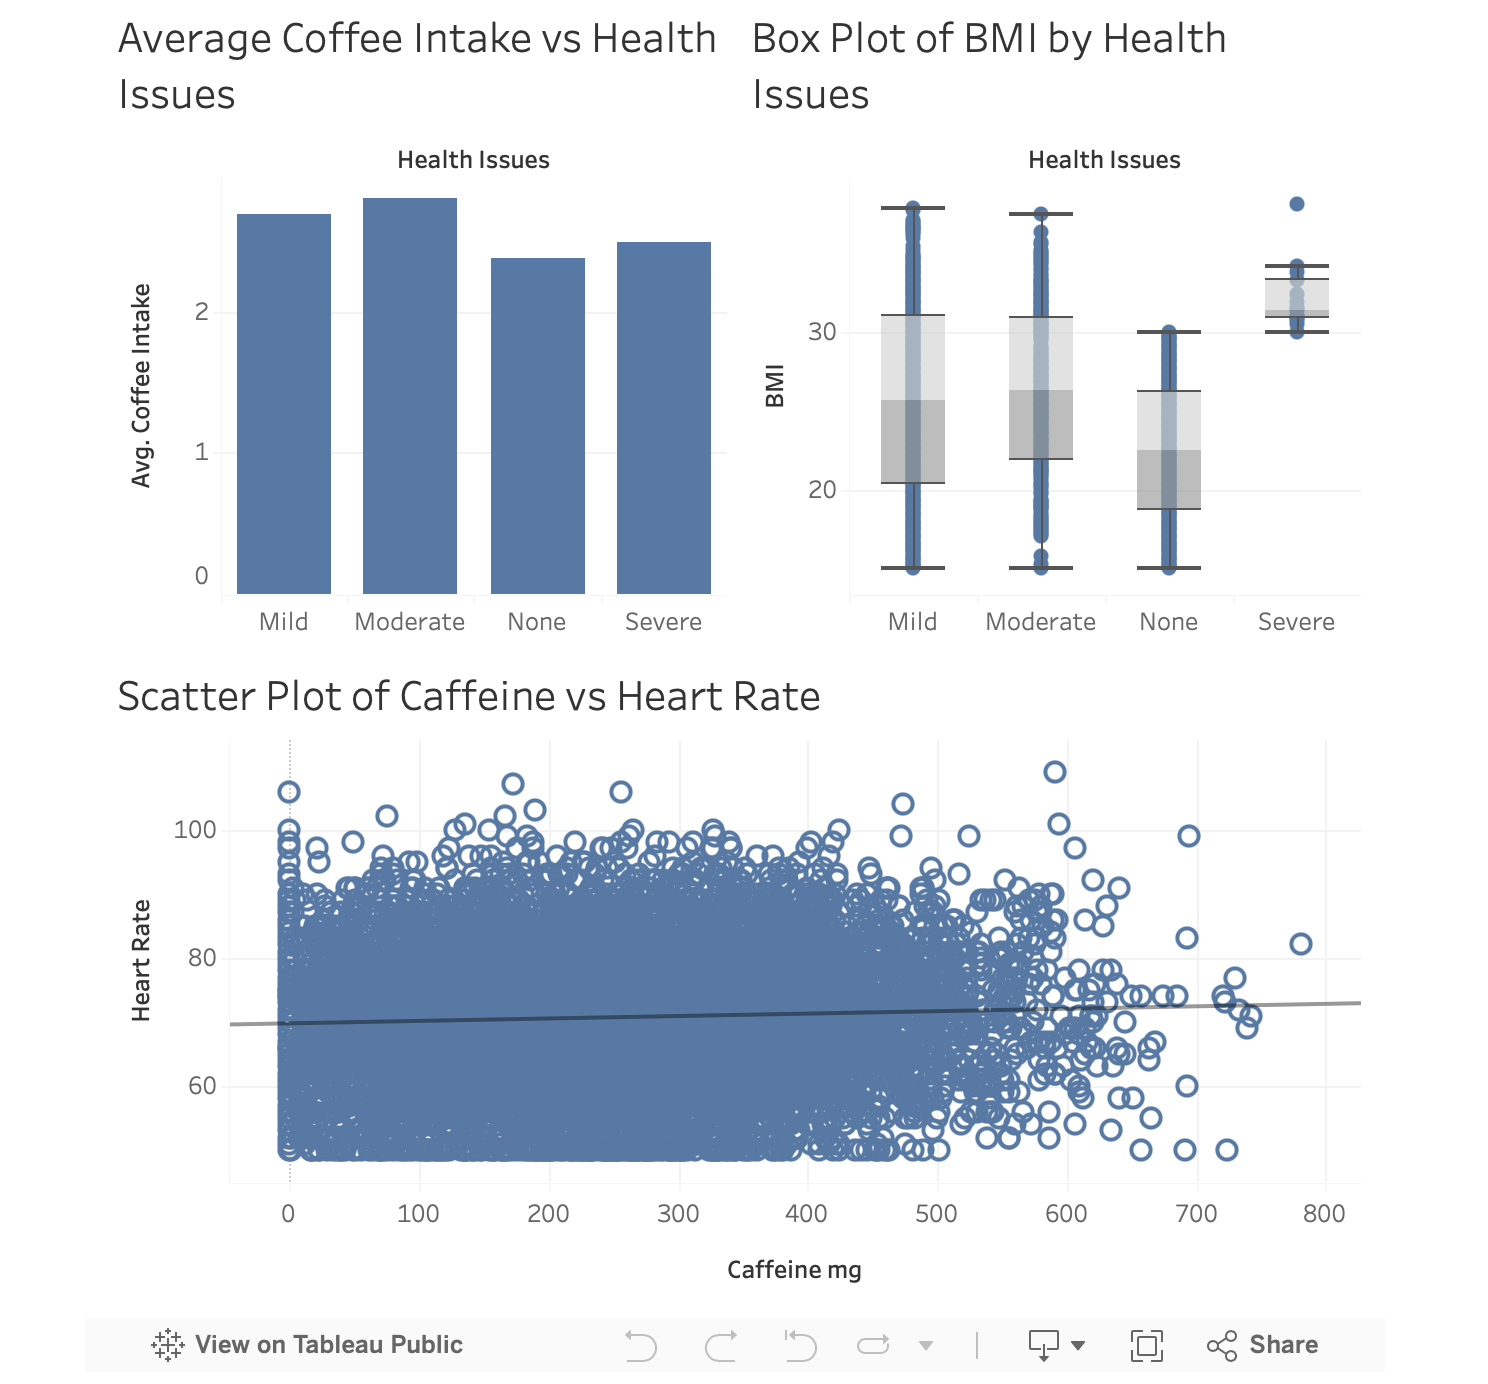

# 5. Contrast with an AI Tool of Your Choice

I decided to put the dataset into a new tab of Gemini from a personal account so that the Gemini in CoLab did not get confused. I prompted Gemini by giving it the CSV file and asking it "can you analyze and summarize the data and goals of this dataset." Gemini gave a detailed response of what data is in the file as well as the potential analytical goals. A similar goal the Gemini gave was "quantifying the coffee-health relationship." Two that were different were "identifying key predictors of health issues" and "segmentation and group comparisons." Overall, Gemini gave a brief idea of how this dataset could be analyzed and broadened the goals that could have been made.